# Part II - Effects of Credit Scores and Risk Ratings on Interest Rates
## by Arthur Ezenwanne 

## Investigation Overview
For the slide deck I will be focusing on the influence of Prosper risk analysis ratings (`ProsperRating`) and credit score bands (`CreditScoreRange`) on interest rates. My hypothesis is that there is a positive relationship between `CreditScoreRange` and `ProsperRating` and an inverse relationship with `BorrowerRate`.

I begin by looking at distributions of the features of interest viz `CreditScoreRange`, `ProsperRating`, and `BorrowerRate`; then studying how each score metric is correlated with rate and finally how both score metrics is distributed against rate. I hypothesize that applications with high score metrics would most likely have very low rates of interest.


## Dataset Overview
Dataset contains 77,524 non null records and 18 features. The features contains 8 `categorical` datatypes, 6 `float` datatypes, and 2 `int` datatypes, 1 `str` datatype, and 1 `bool` datatype.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# I used a cleaned dataset from the previous exploratory analysis
# seaborn has an issue with these Pandas CategoricalDtype so I'll just clean again
# df_clean = pd.read_csv('data_cleaned.csv')
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# code
# convert to categorical
def convert_to_cat(a, b=True):
    '''
    Converts columns to categorical columns from a given dict
    
    Args:
    a: dict containing cols to be converted to categorical datatype
    b: status of the conversion if ordered or not
    
    Returns:
    None
    '''
    for var in a:
        ordered_var = CategoricalDtype(ordered=b, categories=a[var])
        df_clean[var] = df_clean[var].astype(ordered_var)
    

In [4]:
# base color to use in my seaborn visuals
palette_base = sb.color_palette('pastel')

# select the desired columns subset
cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',  
        'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', 
        'LoanOriginalAmount', 'LoanOriginationQuarter', 'PercentFunded', 'InvestmentFromFriendsAmount', 'BorrowerState']

# take a subset of the data
df = df[cols]

# make a copy of the data
df_clean = df.copy()

# rename cols
df_clean.rename(columns={'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory'}, 
                inplace=True)

# drop nulls
df_clean.dropna(inplace=True)

# drop all records with a ListingCategory of 0 
df_clean = df_clean[df_clean.ListingCategory != 0]

# convert the dtype to int so as to remove the floting point zeros
df_clean = df_clean.astype({'CreditScoreRangeLower':'int', 'CreditScoreRangeUpper':'int'})

# convert the dtype to str so as to better join the values
df_clean = df_clean.astype({'CreditScoreRangeLower':'str', 'CreditScoreRangeUpper':'str'})

# create a new feature by
df_clean['CreditScoreRange'] = df_clean.CreditScoreRangeLower + '-' + df_clean.CreditScoreRangeUpper

# drop the base columns
df_clean.drop(labels=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [5]:
# convert Term, ProsperScore, ProsperRating, CreditScoreRange, IncomeRange, and LoanOriginationQuarter
# into ordered categorical types

# change ListingCategory numerical values to their corresponding textual representation
df_clean.ListingCategory = df_clean.ListingCategory.replace({1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 
                                                             4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 
                                                             8:'Baby & Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                                                             11:'Engagement Ring', 12:'Green Loans', 
                                                             13:'Household Expenses', 14:'Large Purchases', 
                                                             15:'Medical Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 
                                                             19:'Vacation', 20:'Wedding Loans'})

# convert Term to a str data since I am not performing calculations on the terms and would be converting it to categorical
df_clean = df_clean.astype({'Term':'str'})

# choose the columns to be ordered and unordered categorical variables
ordinal_var_dict = {'Term': ['12', '36', '60'],
                    'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'CreditScoreRange': ['600-619', '620-639', '640-659', '660-679', '680-699', '700-719', '720-739',
                                         '740-759', '760-779', '780-799', '800-819', '820-839', '840-859', '860-879',
                                         '880-899'],
                    'IncomeRange': ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                                    '$100,000+'],
                    'LoanOriginationQuarter': ['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011',
                                               'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
                                               'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']}
convert_to_cat(ordinal_var_dict)

# convert ListingCategory, EmploymentStatus, and LoanStatus into nominal categorical types
nominal_var_dict = {'ListingCategory': ['Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan',
                                             'Student Use', 'Auto', 'Other', 'Baby & Adoption', 'Boat', 
                                             'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
                                             'Household Expenses', 'Large Purchases', 'Medical Dental', 
                                             'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Not employed', 'Other', 'Part-time', 
                                         'Retired', 'Self-employed'],
                    'LoanStatus': ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']}
convert_to_cat(nominal_var_dict, False)

# convert the EmploymentStatusDuration dtype to int so as to remove the floting point zeros
df_clean = df_clean.astype({'EmploymentStatusDuration':'int64'})

# reset the index
df_clean.reset_index(drop=True, inplace=True)

## Distribution of Borrower Rate
The borrower rate states the risk lender is willinging to bear in the transaction. The data for `BorrowerRate` is fairly uniformly distributed. However, we can see that some data point for `BorrowerRate` between __*0.31*__ and __*0.32*__ seems to contain outliers.

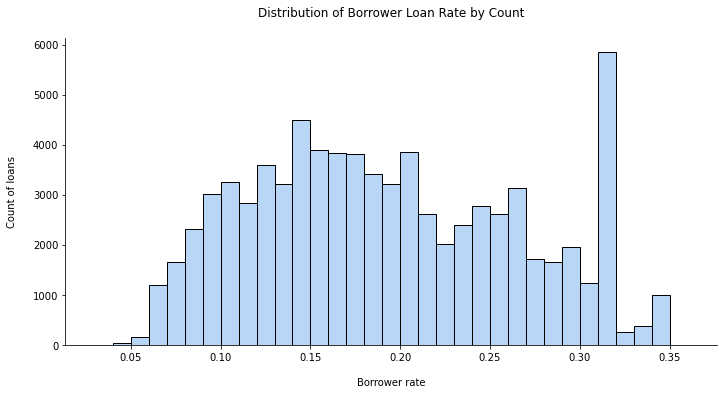

In [6]:
# plot a histogram to look at the loan borrower rate distribution 
bins_edges = np.arange(0.03, df_clean.BorrowerRate.max()+0.01, 0.01)
sb.displot(df_clean.BorrowerRate, bins=bins_edges, color=palette_base[0], height=5, aspect=2)

# 
plt.xlabel('\nBorrower rate')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Borrower Loan Rate by Count\n')

plt.show();

## Distribution of Credit Score Range
The distribution of `CreditScoreRange` is normally distributed (with a slight right tail) and a sizable number (about __*15%*__) of disbursed loans were given to users with above average credit scores, while less than __*4%*__ of disbursed loans were given to users with a low credit score. It is interesting to note that there is a high correlation between `ProsperRating` and `CreditScoreRange`.

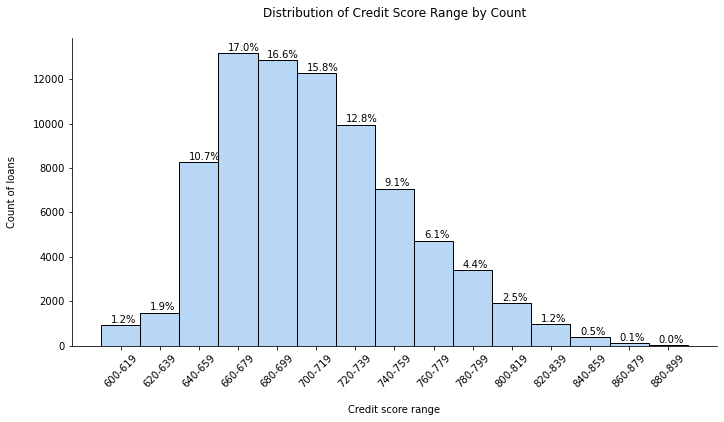

In [7]:
# plot a chart to look at credit score range using the proportion of occurance
# get the proportions
n_loan_status = df_clean.CreditScoreRange.value_counts().sum()
type_counts = df_clean.CreditScoreRange.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(df_clean.CreditScoreRange, color=palette_base[0], height=5, aspect=2).set_xticklabels(rotation=45)

ordered_cat = ['600-619', '620-639', '640-659', '660-679', '680-699', '700-719', '720-739', '740-759', '760-779', 
               '780-799', '800-819', '820-839', '840-859', '860-879', '880-899']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.25, count+100, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nCredit score range')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Credit Score Range by Count\n')

plt.show();

## Distribution of Prosper Rating Score
From the above two charts for  and `CreditScoreRange` We see that the `ProsperRating` feature is normally distributed. We could clearly see that over __*74%*__ of disbursed loans were given to clients with grade between __*D*__ and __*A*__ (inclusive). This also translated to a highly corelated relationship with the `CreditScoreRange` where we see over __*80%*__ of the disbursed loans went to users whose credit range scores was between __*640-759*__.

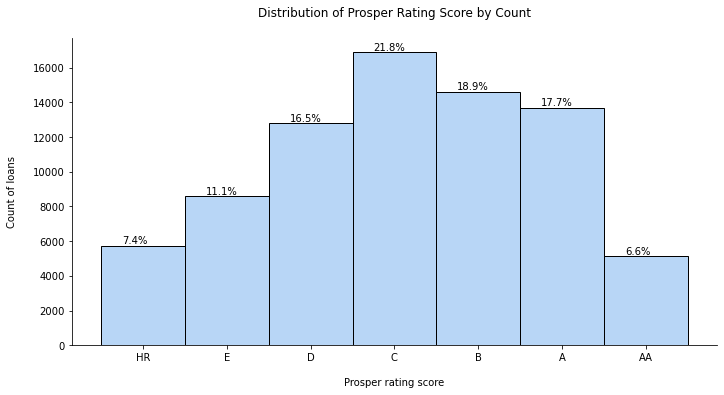

In [8]:
# plot a chart to look at Prosper risk score using the proportion of occurance
# get the proportions
n_loan_status = df_clean.ProsperRating.value_counts().sum()
type_counts = df_clean.ProsperRating.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(df_clean.ProsperRating, color=palette_base[0], height=5, aspect=2)

ordered_cat = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.25, count+100, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nProsper rating score')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Prosper Rating Score by Count\n')

plt.show();

## Borrower Rate vs Credit Score 
As expected, we see a good indication that the rate for each loan is reduced as the `CreditScoreRange` scores increases. This clearly demonstrates the inverse relationship between `CreditScoreRange` and `BorrowerRate`.

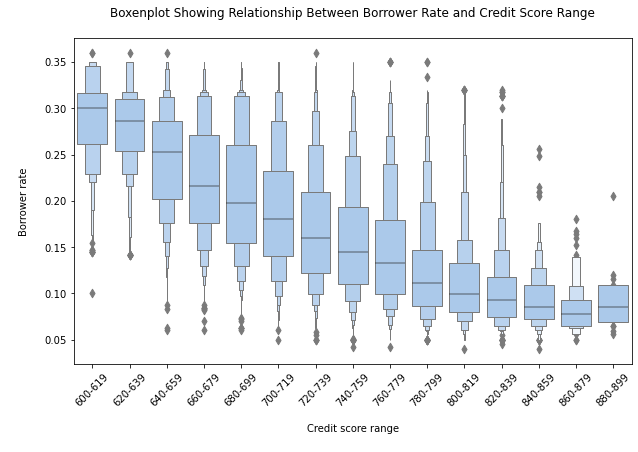

In [9]:
# plot a boxenplot of Borrower Rate vs Credit Score Range
sb.boxenplot(data=df_clean, y='BorrowerRate', x='CreditScoreRange', color=palette_base[0])

# 
plt.xlabel("\nCredit score range\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxenplot Showing Relationship Between Borrower Rate and Credit Score Range\n')
plt.xticks(rotation=45)
plt.show();

## Borrower Rate vs Prosper Rating Score 
As expected, we see a good indication that the rate for each loan is reduced as the `ProsperRating` scores increases, further confirming my hypothesis that there is a strong positive correlation between `ProsperRating` and `CreditScoreRange`, but an inverse relationship with `BorrowerRate`.

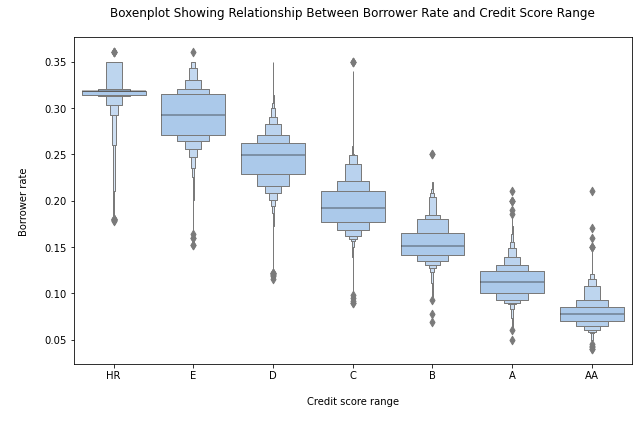

In [10]:
# plot a boxenplot of Borrower Rate vs Prosper Risk Score
sb.boxenplot(data=df_clean, y='BorrowerRate', x='ProsperRating', color=palette_base[0])

# 
plt.xlabel("\nCredit score range\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxenplot Showing Relationship Between Borrower Rate and Credit Score Range\n')
plt.show();

##  Borrower Rate vs Credit Score vs Prosper Rating Score
From the chart we see that high credit scores and/or risk rating is highly correlated with rate. Therefore we may conclude that applicants that have higher credit scores and/or risk scores are more likely to be offered a loan with a lower interest rate.

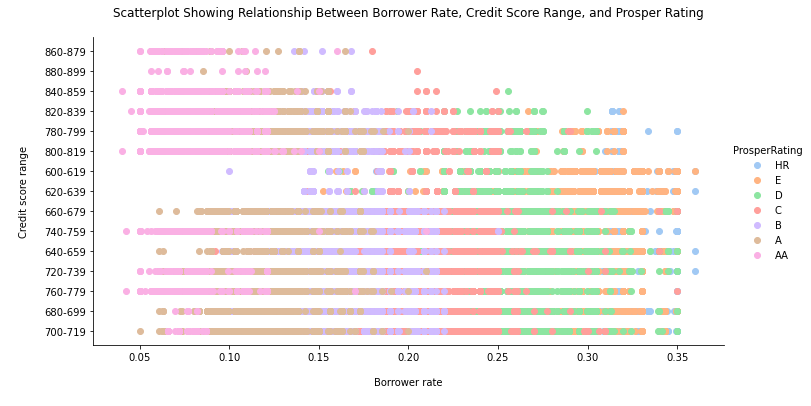

In [11]:
# plot of Borrower Rate, Credit Score Range, and Prosper Rating
g = sb.FacetGrid(data=df_clean, hue='ProsperRating', height=5, aspect=2, palette=palette_base)
g.map(plt.scatter, 'BorrowerRate', 'CreditScoreRange').add_legend();

# 
plt.title('Scatterplot Showing Relationship Between Borrower Rate, Credit Score Range, and Prosper Rating\n')
plt.ylabel("\nCredit score range\n")
plt.xlabel('\nBorrower rate\n')
plt.show();

In [12]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
